In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
dt = pd.read_csv("data/clean/S1Q1_clean.csv")

# Clean data
dt = dt[dt['Note'].isna() | (dt['Note'].str.strip() == '')]

# Replace 0 with 1 in the specified columns
dt.loc[dt['AC_Human'] == 0, 'AC_Human'] = 1
dt.loc[dt['CO_Human'] == 0, 'CO_Human'] = 1
dt.loc[dt['LA_Human'] == 0, 'LA_Human'] = 1
dt.loc[dt['ST_Human'] == 0, 'ST_Human'] = 1

n = len(dt)
print(n)



442


In [3]:
## 1.AC score
# Exact matches
AC_exact = round((abs(dt['AC_IMScore'] - dt['AC_Human']) == 0).sum() / n, 3)

# Adjacent matches
AC_adj = round((abs(dt['AC_IMScore'] - dt['AC_Human']) == 1).sum() / n, 3)

# Off2
AC_off2 = round((abs(dt['AC_IMScore'] - dt['AC_Human']) == 2).sum() / n, 3)

# SDsc
AC_sdsc = round((abs(dt['AC_IMScore'] - dt['AC_Human']) > 2).sum() / n, 3)

# Pearson correlation
AC_pearson = round(pearsonr(dt['AC_IMScore'], dt['AC_Human'])[0], 3)

# Cohen's Kappa
AC_kappa = round(cohen_kappa_score(dt['AC_IMScore'], dt['AC_Human']), 3)

# Quadratic Weighted Kappa
AC_quad_weighted_kappa = round(cohen_kappa_score(dt['AC_IMScore'], dt['AC_Human'], weights='quadratic'), 3)

# Matthews correlation coefficient
AC_matthew = round(matthews_corrcoef(dt['AC_IMScore'], dt['AC_Human']), 3)

# Mean and std for machine score
AC_mean_machine = round(dt['AC_IMScore'].mean(), 3)
AC_std_machine = round(dt['AC_IMScore'].std(), 3)

# Mean and std for human score
AC_mean_human = round(dt['AC_Human'].mean(), 3)
AC_std_human = round(dt['AC_Human'].std(), 3)

# Effect size
AC_effect = round((AC_mean_machine - AC_mean_human) / np.sqrt((AC_std_machine**2 + AC_std_human**2) / 2), 3)

# Create a dataframe with the results
results = pd.DataFrame({
    "Essay": ["S1Q1"],
    "Rubric": ["AC"],
    "N": [n],
    "Exact": [AC_exact],
    "Adj": [AC_adj],
    "Exact+Adj": [AC_exact + AC_adj],
    "Off2": [AC_off2],
    "SDsc": [AC_sdsc],
    "Pearson": [AC_pearson],
    "Kappa": [AC_kappa],
    "QWKappa": [AC_quad_weighted_kappa],
    "Matthews": [AC_matthew],
    "mean_machine": [AC_mean_machine],
    "sd_machine": [AC_std_machine],
    "mean_human": [AC_mean_human],
    "sd_human": [AC_std_human],
    "effect_size": [AC_effect]
})



# Print the dataframe
print(results)


  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S1Q1     AC  442  0.595  0.396      0.991  0.009   0.0    0.407  0.169   

   QWKappa  Matthews  mean_machine  sd_machine  mean_human  sd_human  \
0    0.377     0.181         2.998       0.502       2.819     0.642   

   effect_size  
0        0.311  


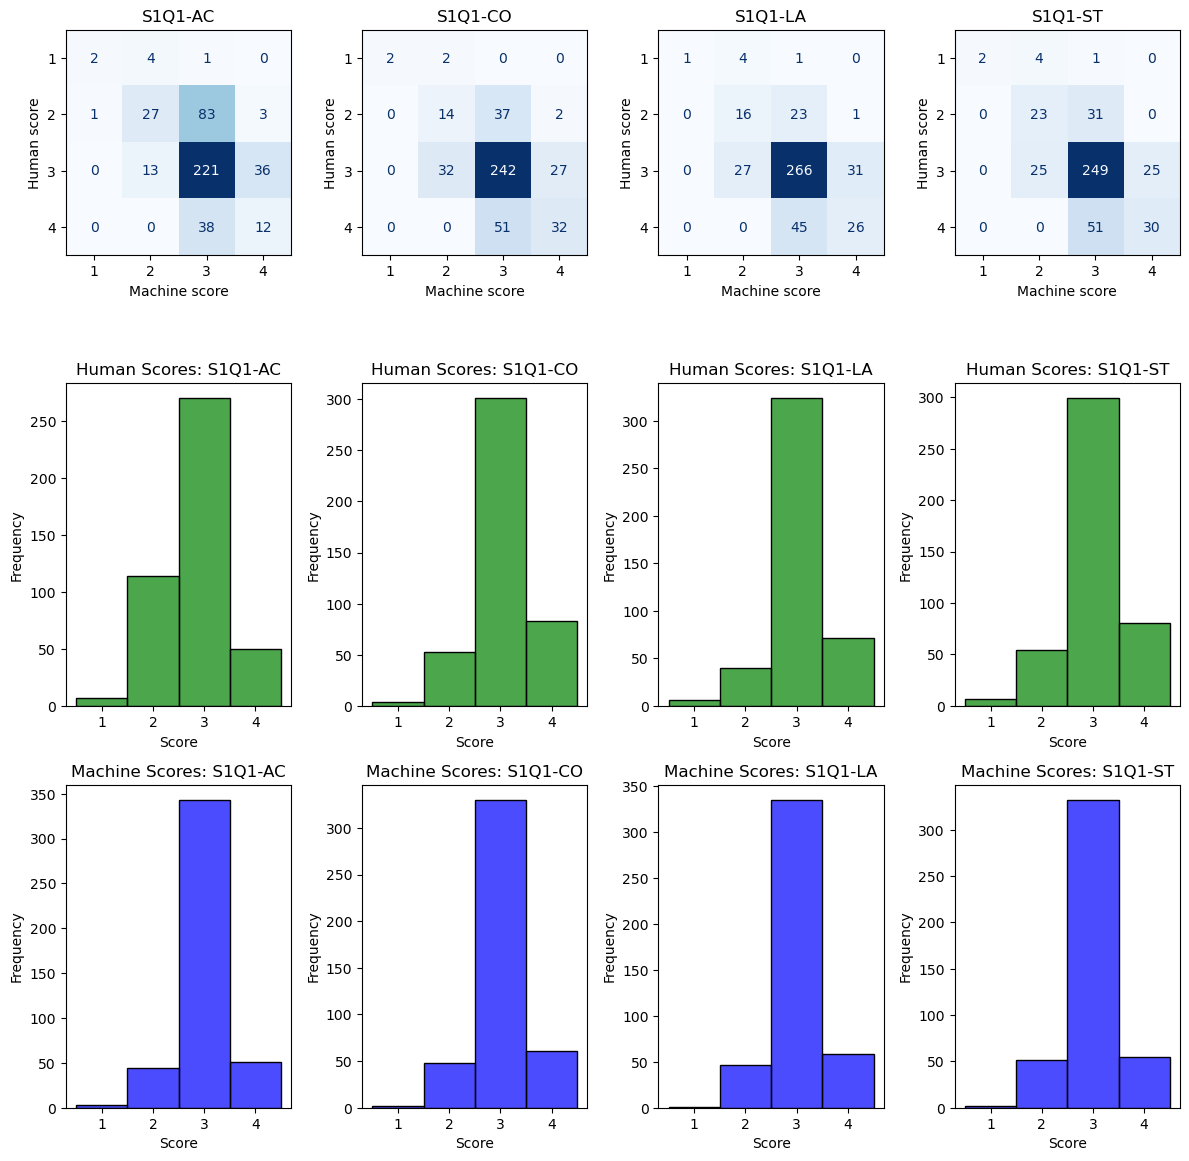

In [45]:
# Load the data
dt = pd.read_csv("data/clean/S1Q1_clean.csv")

# Clean data
dt = dt[dt['Note'].isna() | (dt['Note'].str.strip() == '')]
dt = dt.query('AC_Human > 0 & CO_Human > 0 & LA_Human > 0 & ST_Human > 0')
# Replace 0 with 1 in the specified columns
#dt.loc[dt['AC_Human'] == 0, 'AC_Human'] = 1
#dt.loc[dt['CO_Human'] == 0, 'CO_Human'] = 1
#dt.loc[dt['LA_Human'] == 0, 'LA_Human'] = 1
#dt.loc[dt['ST_Human'] == 0, 'ST_Human'] = 1


# Define the subplots layout
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

# Titles for each subplot
titles = ["S1Q1-AC", "S1Q1-CO", "S1Q1-LA", "S1Q1-ST"]

# Columns corresponding to each subplot
columns = ['AC', 'CO', 'LA', 'ST']

# Generate confusion matrices for each subplot
for ax, title, col in zip(axes[0], titles, columns):
    y_Human = dt[f'{col}_Human']
    predictions = dt[f'{col}_IMScore']
    cm = confusion_matrix(y_Human, predictions, labels=[x for x in range(1, 5)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(1, 5)])
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(title)
    ax.set_xlabel("Machine score")
    ax.set_ylabel("Human score")
    
# Generate histograms for true scores in the first row
for ax, title, col in zip(axes[1], titles, columns):
    y_Human = dt[f'{col}_Human']
    
    sns.histplot(y_Human, bins=6, discrete=True, kde=False, color='green', ax=ax, alpha=0.7)
    
    ax.set_title(f"Human Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Generate histograms for predicted scores in the second row
for ax, title, col in zip(axes[2], titles, columns):
    predictions = dt[f'{col}_IMScore']
    
    sns.histplot(predictions, bins=6, discrete=True, kde=False, color='blue', ax=ax, alpha=0.7)
    
    ax.set_title(f"Machine Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

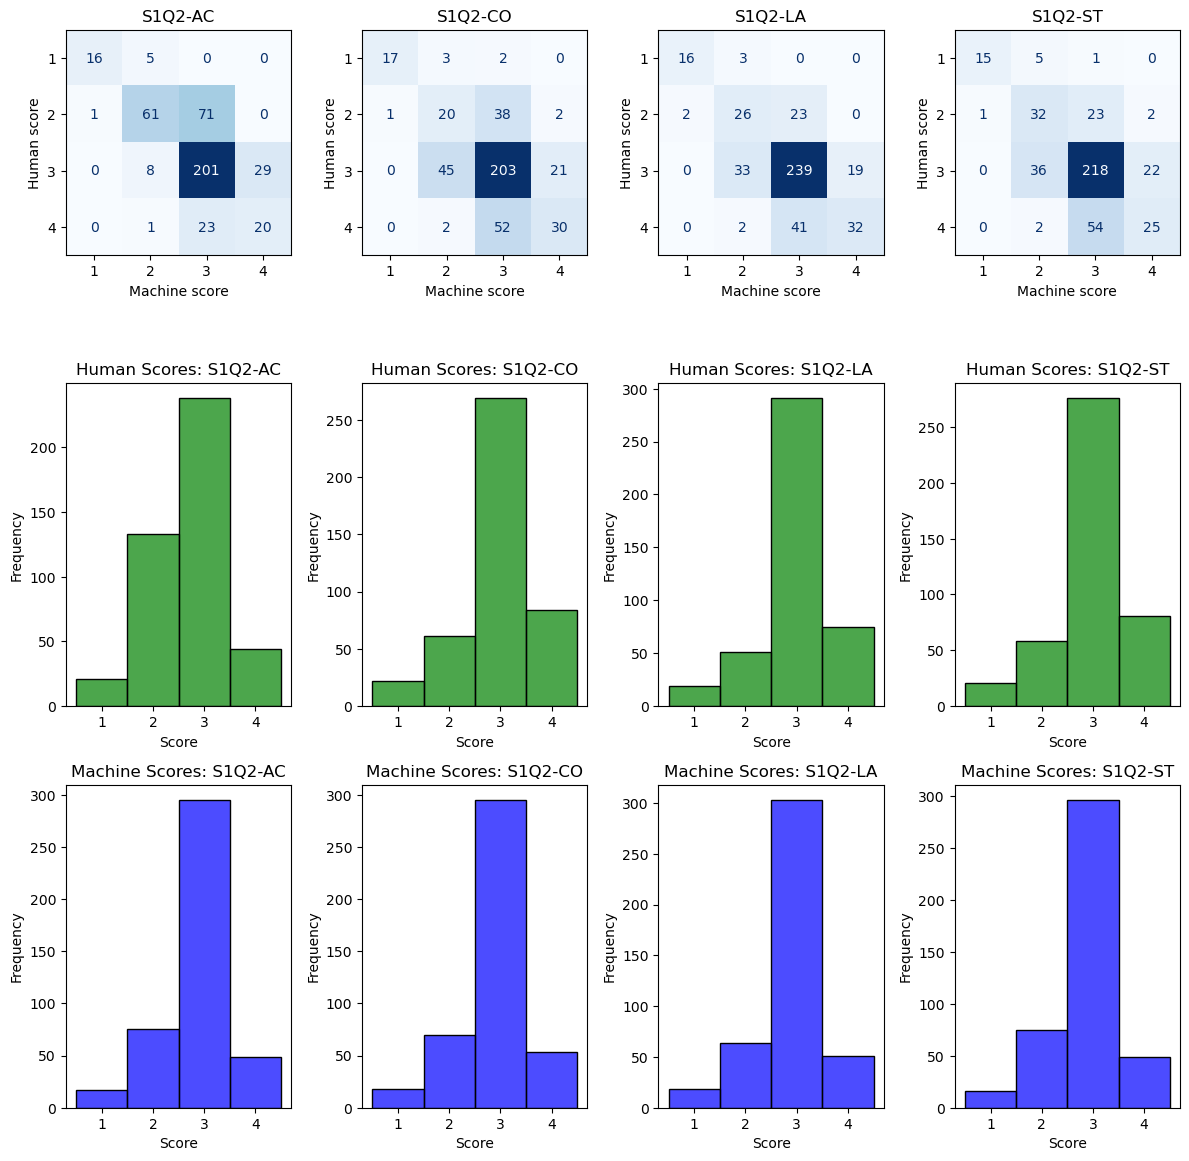

In [46]:
# Load the data
dt = pd.read_csv("data/clean/S1Q2_clean.csv")

# Clean data
dt = dt[dt['Note'].isna() | (dt['Note'].str.strip() == '')]
dt = dt.query('AC_Human > 0 & CO_Human > 0 & LA_Human > 0 & ST_Human > 0')
# Replace 0 with 1 in the specified columns
dt.loc[dt['AC_Human'] == 0, 'AC_Human'] = 1
dt.loc[dt['CO_Human'] == 0, 'CO_Human'] = 1
dt.loc[dt['LA_Human'] == 0, 'LA_Human'] = 1
dt.loc[dt['ST_Human'] == 0, 'ST_Human'] = 1

# Define the subplots layout
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

# Titles for each subplot
titles = ["S1Q2-AC", "S1Q2-CO", "S1Q2-LA", "S1Q2-ST"]

# Columns corresponding to each subplot
columns = ['AC', 'CO', 'LA', 'ST']

# Generate confusion matrices for each subplot
for ax, title, col in zip(axes[0], titles, columns):
    y_Human = dt[f'{col}_Human']
    predictions = dt[f'{col}_IMScore']
    cm = confusion_matrix(y_Human, predictions, labels=[x for x in range(1, 5)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(1, 5)])
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(title)
    ax.set_xlabel("Machine score")
    ax.set_ylabel("Human score")
    
# Generate histograms for true scores in the first row
for ax, title, col in zip(axes[1], titles, columns):
    y_Human = dt[f'{col}_Human']
    
    sns.histplot(y_Human, bins=6, discrete=True, kde=False, color='green', ax=ax, alpha=0.7)
    
    ax.set_title(f"Human Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Generate histograms for predicted scores in the second row
for ax, title, col in zip(axes[2], titles, columns):
    predictions = dt[f'{col}_IMScore']
    
    sns.histplot(predictions, bins=6, discrete=True, kde=False, color='blue', ax=ax, alpha=0.7)
    
    ax.set_title(f"Machine Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [18]:
def get_stats(dt, question, columns):
    n = dt.shape[0]
    results = pd.DataFrame(columns=[
        "Essay", "Rubric", "N", "Exact", "Adj", "Exact+Adj", "Off2", "SDsc", 
        "Pearson", "Kappa", "QWKappa", "Matthews", "mean_machine", 
        "sd_machine", "mean_Human", "sd_Human", "effect_size"
    ])

    for col in columns:
        # Exact matches
        exact = round((abs(dt[f'{col}_IMScore'] - dt[f'{col}_Human']) == 0).sum() / n, 3)
        
        # Adjacent matches
        adj = round((abs(dt[f'{col}_IMScore'] - dt[f'{col}_Human']) == 1).sum() / n, 3)
        
        # Off2
        off2 = round((abs(dt[f'{col}_IMScore'] - dt[f'{col}_Human']) == 2).sum() / n, 3)
        
        # SDsc
        sdsc = round((abs(dt[f'{col}_IMScore'] - dt[f'{col}_Human']) > 2).sum() / n, 3)
        
        # Pearson correlation
        pearson = round(pearsonr(dt[f'{col}_IMScore'], dt[f'{col}_Human'])[0], 3)
        
        # Cohen's Kappa
        kappa = round(cohen_kappa_score(dt[f'{col}_IMScore'], dt[f'{col}_Human']), 3)
        
        # Quadratic Weighted Kappa
        quad_weighted_kappa = round(cohen_kappa_score(dt[f'{col}_IMScore'], dt[f'{col}_Human'], weights='quadratic'), 3)
        
        # Matthews correlation coefficient
        matthew = round(matthews_corrcoef(dt[f'{col}_IMScore'], dt[f'{col}_Human']), 3)
        
        # Mean and std for machine score
        mean_machine = round(dt[f'{col}_IMScore'].mean(), 3)
        std_machine = round(dt[f'{col}_IMScore'].std(), 3)
        
        # Mean and std for true score
        mean_Human = round(dt[f'{col}_Human'].mean(), 3)
        std_Human = round(dt[f'{col}_Human'].std(), 3)
        
        # Effect size
        effect = round((mean_machine - mean_Human) / np.sqrt((std_machine**2 + std_Human**2) / 2), 3)
        
        # Create a dataframe with the results
        result = pd.DataFrame({
            "Essay": [question],
            "Rubric": [col],
            "N": [n],
            "Exact": [exact],
            "Adj": [adj],
            "Exact+Adj": [exact + adj],
            "Off2": [off2],
            "SDsc": [sdsc],
            "Pearson": [pearson],
            "Kappa": [kappa],
            "QWKappa": [quad_weighted_kappa],
            "Matthews": [matthew],
            "mean_machine": [mean_machine],
            "sd_machine": [std_machine],
            "mean_Human": [mean_Human],
            "sd_Human": [std_Human],
            "effect_size": [effect]
        })
        results = pd.concat([results, result], ignore_index=True)
    
    return results




C:\Users\JessieDong\AppData\Local\Temp\ipykernel_26968\3025170847.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q1     AC  334  0.668  0.326      0.994  0.006   0.0    0.573  0.405   
1  S2Q1     CO  334  0.632  0.362      0.994  0.006   0.0    0.483  0.284   
2  S2Q1     LA  334  0.692  0.302      0.994  0.006   0.0    0.549  0.371   
3  S2Q1     ST  334  0.701  0.299      1.000  0.000   0.0    0.583  0.396   

   QWKappa  Matthews  mean_machine  sd_machine  mean_Human  sd_Human  \
0    0.558     0.415         2.778       0.614       2.632     0.629   
1    0.481     0.285         2.769       0.593       2.814     0.626   
2    0.540     0.377         2.778       0.614       2.877     0.569   
3    0.580     0.398         2.790       0.604       2.856     0.588   

   effect_size  
0        0.235  
1       -0.074  
2       -0.167  
3       -0.111  


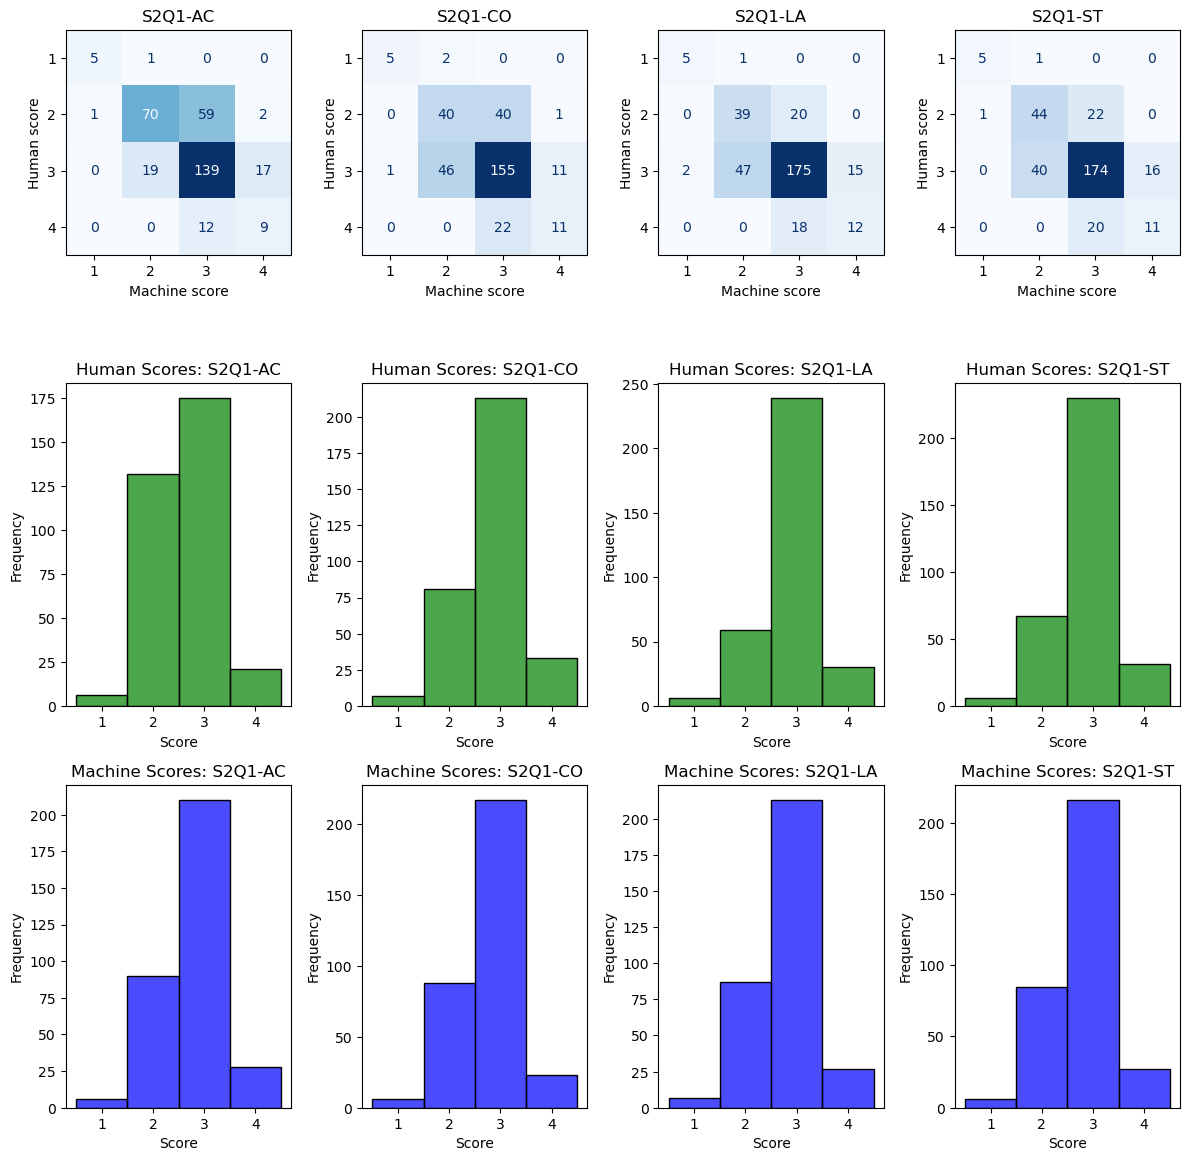

In [23]:
# Load the data
dt = pd.read_csv("data/clean/S2Q1_clean.csv")

# Clean data
dt = dt[dt['Note'].isna() | (dt['Note'].str.strip() == '')]
dt = dt.query('AC_Human > 0 & CO_Human > 0 & LA_Human > 0 & ST_Human > 0')
# Replace 0 with 1 in the specified columns
dt.loc[dt['AC_Human'] == 0, 'AC_Human'] = 1
dt.loc[dt['CO_Human'] == 0, 'CO_Human'] = 1
dt.loc[dt['LA_Human'] == 0, 'LA_Human'] = 1
dt.loc[dt['ST_Human'] == 0, 'ST_Human'] = 1

# Define the subplots layout
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

# Titles for each subplot
titles = ["S2Q1-AC", "S2Q1-CO", "S2Q1-LA", "S2Q1-ST"]

# Columns corresponding to each subplot
columns = ['AC', 'CO', 'LA', 'ST']
stats = get_stats(dt, "S2Q1",columns)
print(stats)


# Generate confusion matrices for each subplot
for ax, title, col in zip(axes[0], titles, columns):
    y_Human = dt[f'{col}_Human']
    predictions = dt[f'{col}_IMScore']
    cm = confusion_matrix(y_Human, predictions, labels=[x for x in range(1, 5)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(1, 5)])
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(title)
    ax.set_xlabel("Machine score")
    ax.set_ylabel("Human score")
    
# Generate histograms for true scores in the first row
for ax, title, col in zip(axes[1], titles, columns):
    y_Human = dt[f'{col}_Human']
    
    sns.histplot(y_Human, bins=6, discrete=True, kde=False, color='green', ax=ax, alpha=0.7)
    
    ax.set_title(f"Human Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Generate histograms for predicted scores in the second row
for ax, title, col in zip(axes[2], titles, columns):
    predictions = dt[f'{col}_IMScore']
    
    sns.histplot(predictions, bins=6, discrete=True, kde=False, color='blue', ax=ax, alpha=0.7)
    
    ax.set_title(f"Machine Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\JessieDong\AppData\Local\Temp\ipykernel_26968\3268668105.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S1Q1     AC  323  0.616  0.372      0.988  0.012   0.0    0.630  0.385   
1  S1Q1     CO  323  0.644  0.347      0.991  0.009   0.0    0.606  0.348   
2  S1Q1     LA  323  0.687  0.307      0.994  0.006   0.0    0.661  0.436   
3  S1Q1     ST  323  0.656  0.337      0.993  0.006   0.0    0.631  0.394   

   QWKappa  Matthews  mean_machine  sd_machine  mean_Human  sd_Human  \
0    0.602     0.400         2.715       0.704       2.498     0.720   
1    0.603     0.354         2.749       0.689       2.817     0.701   
2    0.658     0.440         2.746       0.699       2.805     0.693   
3    0.631     0.394         2.749       0.689       2.765     0.714   

   effect_size  
0        0.305  
1       -0.098  
2       -0.085  
3       -0.023  


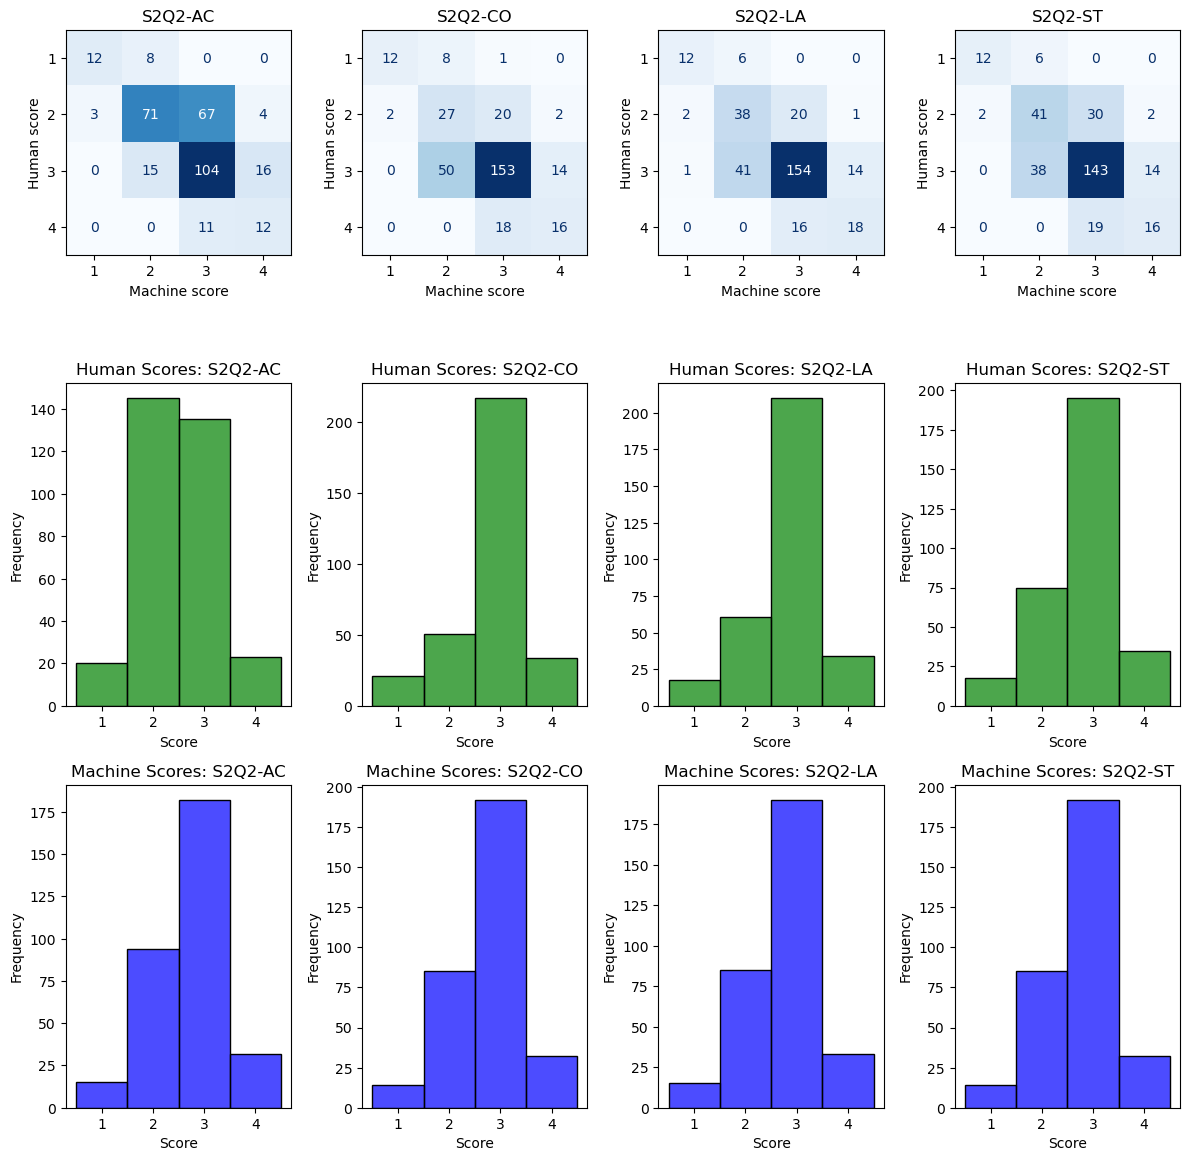

In [9]:
# Load the data
dt = pd.read_csv("data/clean/S2Q2_clean.csv")

# Clean data
dt = dt[dt['Note'].isna() | (dt['Note'].str.strip() == '')]
dt = dt.query('AC_Human > 0 & CO_Human > 0 & LA_Human > 0 & ST_Human > 0')
# Replace 0 with 1 in the specified columns
dt.loc[dt['AC_Human'] == 0, 'AC_Human'] = 1
dt.loc[dt['CO_Human'] == 0, 'CO_Human'] = 1
dt.loc[dt['LA_Human'] == 0, 'LA_Human'] = 1
dt.loc[dt['ST_Human'] == 0, 'ST_Human'] = 1

columns = ['AC', 'CO', 'LA', 'ST']
stats = get_stats(dt, columns)
print(stats)


# Define the subplots layout
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

# Titles for each subplot
titles = ["S2Q2-AC", "S2Q2-CO", "S2Q2-LA", "S2Q2-ST"]

# Columns corresponding to each subplot
columns = ['AC', 'CO', 'LA', 'ST']

# Generate confusion matrices for each subplot
for ax, title, col in zip(axes[0], titles, columns):
    y_Human = dt[f'{col}_Human']
    predictions = dt[f'{col}_IMScore']
    cm = confusion_matrix(y_Human, predictions, labels=[x for x in range(1, 5)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(1, 5)])
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(title)
    ax.set_xlabel("Machine score")
    ax.set_ylabel("Human score")
    
# Generate histograms for true scores in the first row
for ax, title, col in zip(axes[1], titles, columns):
    y_Human = dt[f'{col}_Human']
    
    sns.histplot(y_Human, bins=6, discrete=True, kde=False, color='green', ax=ax, alpha=0.7)
    
    ax.set_title(f"Human Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Generate histograms for predicted scores in the second row
for ax, title, col in zip(axes[2], titles, columns):
    predictions = dt[f'{col}_IMScore']
    
    sns.histplot(predictions, bins=6, discrete=True, kde=False, color='blue', ax=ax, alpha=0.7)
    
    ax.set_title(f"Machine Scores: {title}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()